# Taller 2 – HabitAlpes
## Actividad 1. Entendimiento y preparación de los datos

En esta sección realizamos un primer entendimiento del dataset de apartamentos
para apoyar a HabitAlpes en la estimación del valor de las propiedades.

Objetivos específicos:

- Identificar dimensiones del dataset (número de registros y variables).
- Revisar el diccionario de datos y la naturaleza de las variables.
- Evaluar calidad de los datos (nulos, valores atípicos, duplicados).
- Construir indicadores básicos relevantes para el negocio (precio, área,
  estrato, ubicación, cercanía a transporte y parques).
- Dejar preparado el dataset para el posterior modelado.


### Paso 1. Descarga de librerias y carga de la DB

In [1]:
import pandas as pd
import numpy as np


# Ruta a los datos (ajustar según tu estructura de carpetas)
PATH_CSV = "data/apartamentos.csv"
PATH_DICT = "data/Diccionario de datos - apartamentos.html"

# Cargar dataset principal
df = pd.read_csv(PATH_CSV)

# Cargar diccionario de datos (primera tabla del HTML)
diccionario = pd.read_html(PATH_DICT, header=0)[0]

df.shape, diccionario.shape

((43013, 46), (44, 2))

#### Visualización de la DB cargada.
Corroboramos que estemos cargando correctamente la información suministrada.

In [2]:
# Primeras filas del dataset
df.head()

_id   codigo tipo_propiedad tipo_operacion  \
0  66d86c7eceda690e85508760  4133491    APARTAMENTO          VENTA   
1  66d86c7eceda690e85508761  3889852    APARTAMENTO          VENTA   
2  66d86c7eceda690e85508762  4386770    APARTAMENTO          VENTA   
3  66d86c7eceda690e85508763  4210060    APARTAMENTO          VENTA   
4  66d86c7eceda690e85508764  4063762    APARTAMENTO          VENTA   

   precio_venta  area  habitaciones  banos  administracion  parqueaderos  ...  \
0   339000000.0  76.0           3.0    2.0        300000.0           1.0  ...   
1   223000000.0  63.0           3.0    2.0             NaN           0.0  ...   
2   440898168.0  54.0           3.0    2.0        305000.0           0.0  ...   
3   158000000.0  43.0           2.0    2.0        106600.0           0.0  ...   
4   222800000.0  48.0           3.0    2.0        151000.0           0.0  ...   

  vigilancia  coords_modified     localidad                      barrio  \
0        0.0            False          SUBA              URB. PICADELLY   
1        0.0            False       USAQUEN  BARRANCAS PERLAS DEL NORTE   
2        0.0            False  LOS MARTIRES               SAN VICTORINO   
3        0.0            False          SUBA              LA ESTRELLA II   
4        0.0            False       USAQUEN          HORIZONTES USAQUEN   

   estacion_tm_cercana distancia_estacion_tm_m is_cerca_estacion_tm  \
0  Toberin - Foundever                 1142.45                    0   
1              Mazurén                 2384.89                    0   
2         De La Sabana                  232.22                    1   
3          Portal Suba                 2275.08                    0   
4             Terminal                 2099.16                    0   

                                      parque_cercano distancia_parque_m  \
0  PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...             426.09   
1                           PARQUE ZONAL ALTA BLANCA             472.47   
2                PARQUE METROPOLITANO TERCER MILENIO             961.29   
3                            PARQUE ZONAL LA GAITANA             539.98   
4               PARQUE VECINAL DESARROLLO VERBENAL I            1661.14   

  is_cerca_parque  
0               1  
1               1  
2               0  
3               0  
4               0  

[5 rows x 46 columns]

In [3]:
# Diccionario de datos
diccionario

Columna                                        Descripción
0                    codigo       Código único que identifica cada apartamento
1            tipo_propiedad        Tipo de propiedad (apartamento, casa, etc.)
2            tipo_operacion          Tipo de operación (venta, arriendo, etc.)
3              precio_venta                Precio de venta del apartamento COP
4           precio_arriendo             Precio de arriendo del apartamento COP
5                      area           Área del apartamento en metros cuadrados
6              habitaciones             Número de habitaciones del apartamento
7                     banos                    Número de baños del apartamento
8            administracion  Valor de la cuota de administración del aparta...
9              parqueaderos                 Número de parqueaderos disponibles
10                   sector  Sector o zona en la que se encuentra el aparta...
11                  estrato             Estrato socioeconómico del apartamento
12               antiguedad                 Antigüedad del apartamento en años
13                   estado              Estado del apartamento (nuevo, usado)
14                 longitud                Longitud geográfica del apartamento
15                  latitud                 Latitud geográfica del apartamento
16              descripcion              Descripción detallada del apartamento
17                 datetime            Fecha y hora de extracción de los datos
18                  jacuzzi        Indica si el apartamento cuenta con jacuzzi
19                  piscina        Indica si el apartamento cuenta con piscina
20            salon_comunal  Indica si el apartamento cuenta con salón comunal
21                  terraza        Indica si el apartamento cuenta con terraza
22               vigilancia  Indica si el apartamento cuenta con vigilancia...
23                     piso  Número de piso en el que se encuentra el apart...
24                  closets                Número de closets en el apartamento
25                 chimenea       Indica si el apartamento cuenta con chimenea
26         permite_mascotas   Indica si se permiten mascotas en el apartamento
27                 gimnasio       Indica si el apartamento cuenta con gimnasio
28                 ascensor          Indica si el edificio cuenta con ascensor
29         conjunto_cerrado  Indica si el apartamento se encuentra en conju...
30          coords_modified            Coordenadas modificadas del apartamento
31                localidad    Localidad en la que se encuentra el apartamento
32                   barrio       Barrio en el que se encuentra el apartamento
33      estacion_tm_cercana  Nombre de la estacion de transporte masivo mas...
34  distancia_estacion_tm_m  Distancia a la estación de transporte masivo m...
35     is_cerca_estacion_tm  Indica si está cerca de una estación de transp...
36           parque_cercano       Nombre del parque más cercano al apartamento
37       distancia_parque_m  Distancia al parque más cercano al apartamento...
38          is_cerca_parque          Indica si está cerca de un parque <= 500m
39                  website               Sitio web relacionado a la propiedad
40                 compañia     Compañía o agencia responsable de la propiedad
41                last_view  Fecha de la ultima vez que el scraper visito e...
42                 timeline               Historial de precios del apartamento
43                      url                                URL del apartamento

#### Tipo de datos encontrados

Describimos los tipos de datos encontrados para cada elemento presente en la DB

In [4]:
# Tipos de datos
df.dtypes

_id                         object
codigo                      object
tipo_propiedad              object
tipo_operacion              object
precio_venta               float64
area                       float64
habitaciones               float64
banos                      float64
administracion             float64
parqueaderos               float64
sector                      object
estrato                    float64
antiguedad                  object
latitud                    float64
longitud                   float64
direccion                   object
descripcion                 object
website                     object
last_view                   object
datetime                    object
url                         object
timeline                    object
estado                      object
compañia                    object
precio_arriendo            float64
jacuzzi                    float64
piso                       float64
closets                    float64
chimenea            

#### Dimensión de la DB

En consonancia con los requisitos listados de la Actividad, se muestran las dimensiones de la DB.

In [5]:
n_filas, n_cols = df.shape
print("Filas:", n_filas)
print("Columnas:", n_cols)

print("\n¿Códigos únicos?:", df["codigo"].nunique() == n_filas)

Filas: 43013
Columnas: 46

¿Códigos únicos?: True


In [6]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

piso                43013
closets             43013
url                 42219
direccion           42219
precio_arriendo     27184
precio_venta        15429
timeline            13586
administracion       7925
compañia             4530
sector               1641
estado                796
barrio                193
antiguedad             10
gimnasio                2
chimenea                2
ascensor                2
conjunto_cerrado        2
piscina                 2
jacuzzi                 2
salon_comunal           2
terraza                 2
permite_mascotas        2
last_view               2
datetime                2
website                 2
vigilancia              2
estrato                 1
parqueaderos            1
banos                   1
habitaciones            1
dtype: int64

### Parte 2. Visualización de indicadores interesantes

A continuación, empezamos a mostrar indicadores en consonancia con las actividades del cliente.



In [7]:
import matplotlib.pyplot as plt

# Opciones generales de visualización
plt.style.use("default")


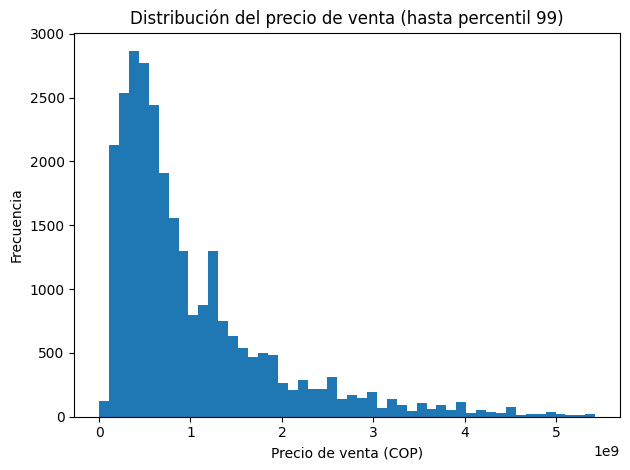

In [8]:
# Filtramos solo propiedades con precio de venta
df_venta = df[df["precio_venta"].notna()].copy()

# Recortamos al percentil 99 para que los outliers no dominen la escala
p99_precio = df_venta["precio_venta"].quantile(0.99)
df_venta_filtrado = df_venta[df_venta["precio_venta"] <= p99_precio]

plt.figure()
df_venta_filtrado["precio_venta"].plot(kind="hist", bins=50)
plt.xlabel("Precio de venta (COP)")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio de venta (hasta percentil 99)")
plt.tight_layout()


En este gráfico se observa la distribución de los **precios de venta** recortados al percentil 99, lo que deja 27.308 apartamentos con valores representativos. Aproximadamente el 50\% de las propiedades se ubica por debajo de los 700,0 millones de COP, mientras que el 25\% más económico está por debajo de unos 400,0 millones y el 25\% más costoso supera los 1.300,0 millones. En este rango filtrado, los precios van desde cerca de 1,0 millones hasta alrededor de 5.428,7 millones de COP. Esto confirma un portafolio con tickets medios y altos, y justifica limitar los outliers para que un pequeño grupo de propiedades extremadamente costosas no distorsione la escala ni el entrenamiento del modelo.


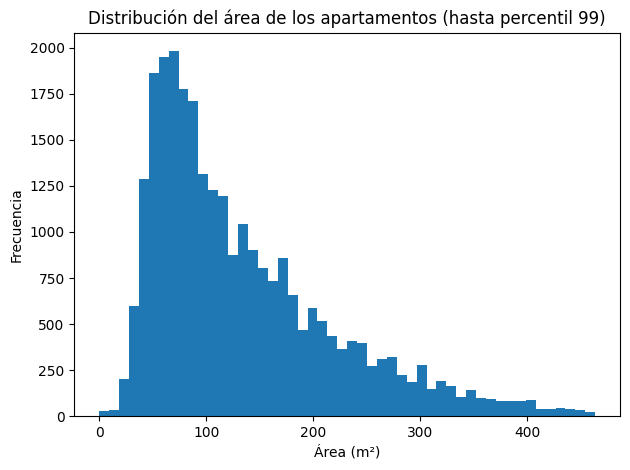

In [9]:
# Histograma del área (también recortado al percentil 99)
p99_area = df_venta["area"].quantile(0.99)
df_area_filtrado = df_enta = df_venta[df_venta["area"] <= p99_area]

plt.figure()
df_area_filtrado["area"].plot(kind="hist", bins=50)
plt.xlabel("Área (m²)")
plt.ylabel("Frecuencia")
plt.title("Distribución del área de los apartamentos (hasta percentil 99)")
plt.tight_layout()


El histograma del **área de los apartamentos** (también recortado al percentil 99) muestra que la mayoría de unidades se concentra entre aproximadamente 69 y 178 m², con una mediana cercana a los 109 m². Aunque existen algunos registros con áreas muy pequeñas (cercanas a 0 m²) y un 1\% de propiedades por encima de 463 m², estos casos son poco frecuentes. Para HabitAlpes, esto implica que el modelo aprenderá principalmente sobre tamaños de vivienda típicos del portafolio (entre ~70 y 180 m²) y tendrá menos información sobre productos extremadamente grandes o atípicos.


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_6516\3522729661.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_venta["precio_m2"].replace([np.inf, -np.inf], np.nan, inplace=True)


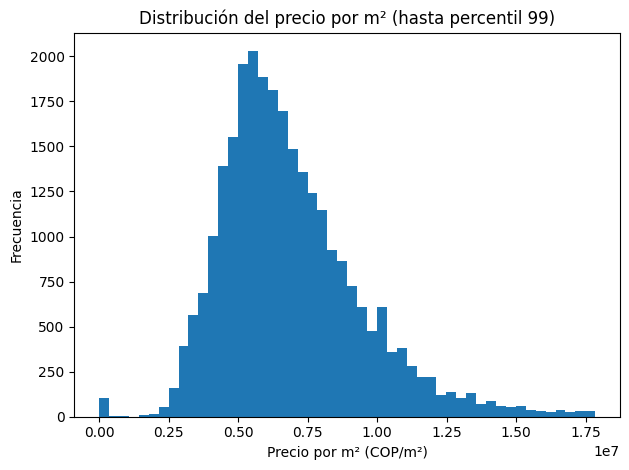

In [10]:
# Precio por m²
df_venta = df_venta.copy()
df_venta["precio_m2"] = df_venta["precio_venta"] / df_venta["area"]
df_venta["precio_m2"].replace([np.inf, -np.inf], np.nan, inplace=True)
df_venta = df_venta[df_venta["precio_m2"].notna()]

p99_precio_m2 = df_venta["precio_m2"].quantile(0.99)
df_precio_m2_filtrado = df_venta[df_venta["precio_m2"] <= p99_precio_m2]

plt.figure()
df_precio_m2_filtrado["precio_m2"].plot(kind="hist", bins=50)
plt.xlabel("Precio por m² (COP/m²)")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio por m² (hasta percentil 99)")
plt.tight_layout()


La distribución del **precio por metro cuadrado** evidencia una fuerte concentración entre aproximadamente 5,2 y 8,2 millones de COP/m², con una mediana cercana a 6,4 millones de COP/m². Después de recortar al percentil 99, los valores típicos van desde unos 0,0 millones hasta alrededor de 17,8 millones de COP/m², siendo estos últimos casos muy excepcionales. Esta variabilidad en el precio por m² confirma que el valor del inmueble no es homogéneo y depende de factores como ubicación, estrato y características internas, lo cual justifica incluir estas variables en el modelo.


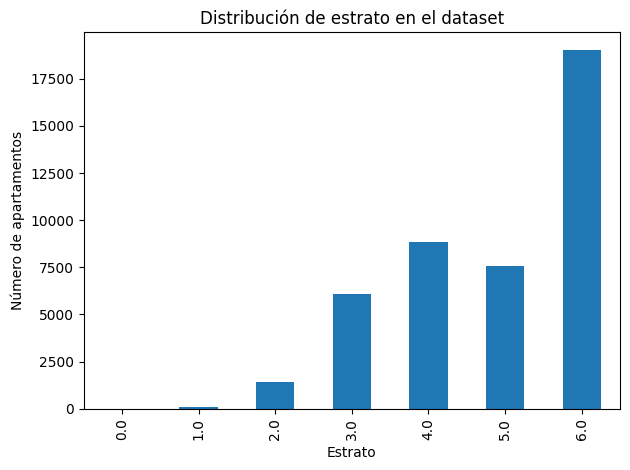

In [11]:
# Distribución de estrato
plt.figure()
df["estrato"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Estrato")
plt.ylabel("Número de apartamentos")
plt.title("Distribución de estrato en el dataset")
plt.tight_layout()


La gráfica de **distribución de estrato** muestra que el dataset está fuertemente concentrado en estratos altos: cerca del 44.2\% de los apartamentos corresponde a estrato 6, alrededor de 20.6\% a estrato 4 y aproximadamente 17.6\% a estrato 5. Los estratos 2 y 3 aportan en conjunto alrededor de 17.4\% de las observaciones, mientras que los estratos 0 y 1 son marginales. Para HabitAlpes, esto implica que el modelo será especialmente confiable en segmentos de estrato medio–alto y alto, y algo menos preciso en estratos con baja cobertura de datos.


<Figure size 640x480 with 0 Axes>

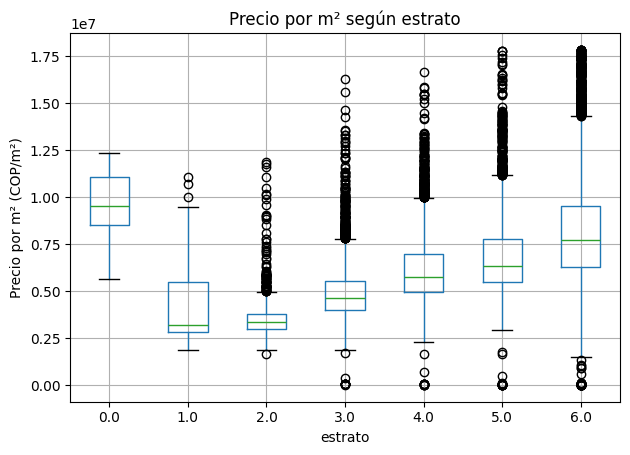

In [12]:
# Precio por m² por estrato (boxplot)
plt.figure()
df_precio_m2_filtrado.boxplot(column="precio_m2", by="estrato")
plt.ylabel("Precio por m² (COP/m²)")
plt.title("Precio por m² según estrato")
plt.suptitle("")  # Elimina el título extra que pone pandas
plt.tight_layout()


El boxplot de **precio por m² según estrato** confirma una relación clara entre nivel socioeconómico y valor del metro cuadrado. Por ejemplo, la mediana en estrato 2 se sitúa alrededor de 3,3 millones de COP/m², mientras que en estrato 3 sube a unos 4,6 millones, en estrato 4 ronda los 5,8 millones y en estrato 6 alcanza cerca de 7,7 millones de COP/m². Esta gradiente cuantitativa refuerza la importancia de incluir el estrato como variable explicativa del precio por m² en el modelo.


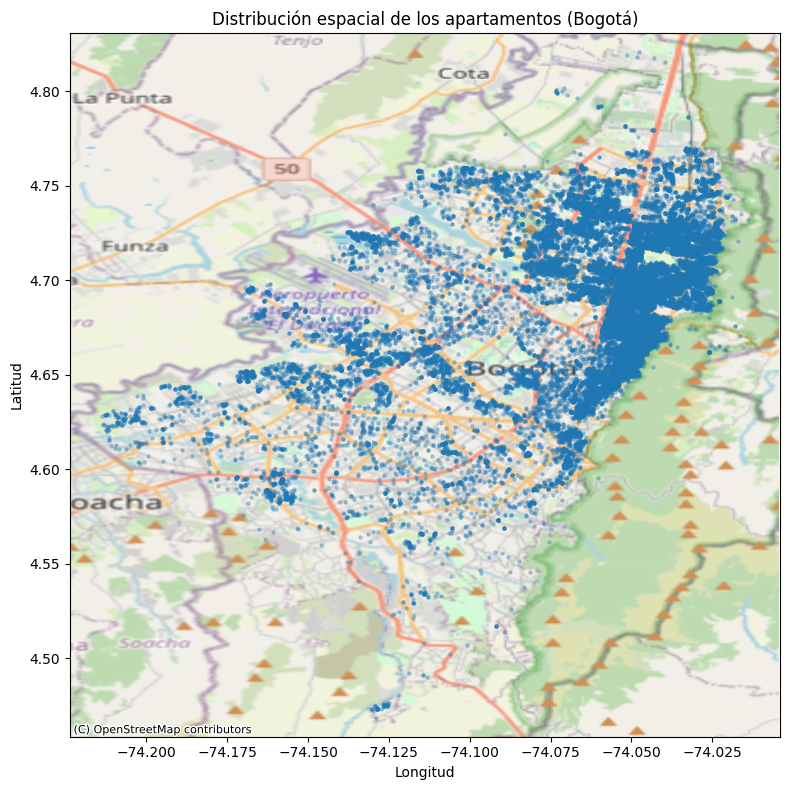

In [13]:
import matplotlib.pyplot as plt
import contextily as cx

# Filtrar datos con coordenadas válidas
df_geo = df.dropna(subset=["latitud", "longitud"])

fig, ax = plt.subplots(figsize=(8, 8))

# Tus puntos en lon/lat
ax.scatter(
    df_geo["longitud"],
    df_geo["latitud"],
    s=5,
    alpha=0.3
)

# Ajustar límites del mapa alrededor de los puntos (opcional pero ayuda)
ax.set_xlim(df_geo["longitud"].min() - 0.01, df_geo["longitud"].max() + 0.01)
ax.set_ylim(df_geo["latitud"].min() - 0.01, df_geo["latitud"].max() + 0.01)

# Añadir mapa de fondo usando OpenStreetMap
cx.add_basemap(
    ax,
    crs="EPSG:4326",                       # tus datos están en lon/lat
    source=cx.providers.OpenStreetMap.Mapnik
)

ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_title("Distribución espacial de los apartamentos (Bogotá)")

plt.tight_layout()
plt.show()


La **distribución espacial de los apartamentos** incluye aproximadamente 43.013 registros con coordenadas válidas, con latitudes entre 4.469 y 4.821, y longitudes entre -74.214 y -74.014. Visualmente se observan núcleos de alta densidad en zonas como Usaquén, Chapinero y Suba, que de hecho concentran más del 80\% de las observaciones según la distribución por localidad. Para HabitAlpes, esta concentración geográfica implica que el modelo estará especialmente bien calibrado para estas áreas, mientras que en zonas con menos datos conviene interpretar las predicciones con mayor cautela.


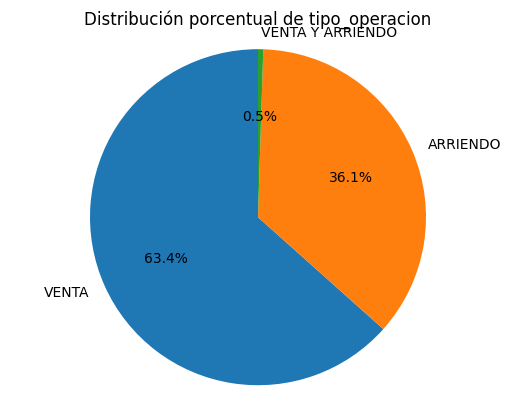

tipo_operacion
VENTA               63.4
ARRIENDO            36.1
VENTA Y ARRIENDO     0.5
Name: proportion, dtype: float64

In [14]:
# Porcentaje de cada tipo de operación
tipo_pct = df["tipo_operacion"].value_counts(normalize=True).round(3) * 100

plt.figure()
plt.pie(
    tipo_pct,
    labels=tipo_pct.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribución porcentual de tipo_operacion")
plt.axis("equal")  # Para que el círculo no quede ovalado
plt.show()

tipo_pct

El diagrama de pastel de **tipo de operación** muestra que aproximadamente 63.4\% de los registros corresponden a VENTA, 36.1\% a ARRIENDO y apenas 0.5\% a inmuebles anunciados simultáneamente para venta y arriendo. En términos de modelado, esto indica que existe una base sólida de datos de venta para entrenar el modelo de precios, mientras que las otras modalidades tienen una participación menor.


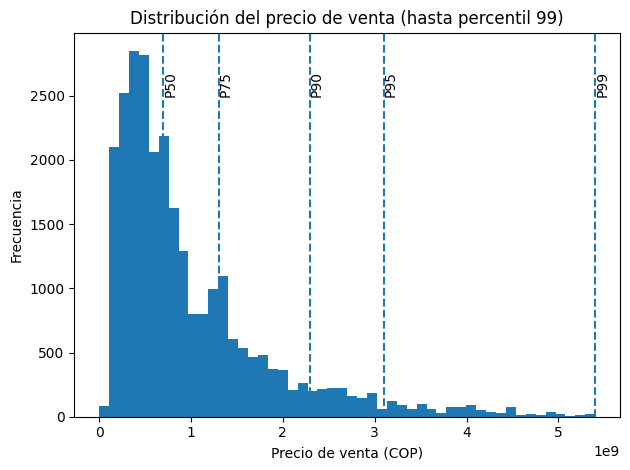

count    2.727000e+04
mean     2.371398e+09
std      5.606173e+10
min      1.000000e+06
50%      7.000000e+08
75%      1.300000e+09
90%      2.292300e+09
95%      3.100000e+09
99%      5.400000e+09
max      4.250000e+12
Name: precio_venta, dtype: float64

In [15]:
# Filtrar solo operaciones de VENTA con precio válido
df_venta = df[df["tipo_operacion"] == "VENTA"].copy()
df_venta = df_venta[df_venta["precio_venta"].notna()]

# Calcular percentiles
percentiles = df_venta["precio_venta"].quantile([0.5, 0.75, 0.9, 0.95, 0.99])
p50, p75, p90, p95, p99 = percentiles[0.5], percentiles[0.75], percentiles[0.9], percentiles[0.95], percentiles[0.99]

# Recortar al percentil 99 para que los outliers no destruyan la escala
df_venta_plot = df_venta[df_venta["precio_venta"] <= p99]

plt.figure()
plt.hist(df_venta_plot["precio_venta"], bins=50)
plt.xlabel("Precio de venta (COP)")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio de venta (hasta percentil 99)")

# Líneas verticales en los percentiles
for v, label in zip([p50, p75, p90, p95, p99], ["P50", "P75", "P90", "P95", "P99"]):
    plt.axvline(v, linestyle="--")
    plt.text(v, plt.ylim()[1]*0.9, label, rotation=90, va="top")

plt.tight_layout()
plt.show()

# Si quieres seguir viendo la tabla de describe, deja esta línea;
# si no, elimínala:
df_venta["precio_venta"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]).round(2)


En las gráficas asociadas al **precio de venta para operaciones de VENTA** se observa un comportamiento similar al del conjunto global, pero ahora enfocado únicamente en este segmento. La mediana de los precios de venta se sitúa alrededor de 700,0 millones de COP, el percentil 75 llega a unos 1.300,0 millones, y el 10\% más costoso supera los 2.292,3 millones. Los percentiles 95 y 99 se aproximan a 3.100,0 y 5.400,0 millones respectivamente. Esta concentración en un rango amplio refuerza la necesidad de que HabitAlpes utilice un modelo capaz de manejar correctamente tanto apartamentos de ticket medio como propiedades de muy alto valor.


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_6516\1096661627.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["precio_m2"].replace([np.inf, -np.inf], np.nan, inplace=True)


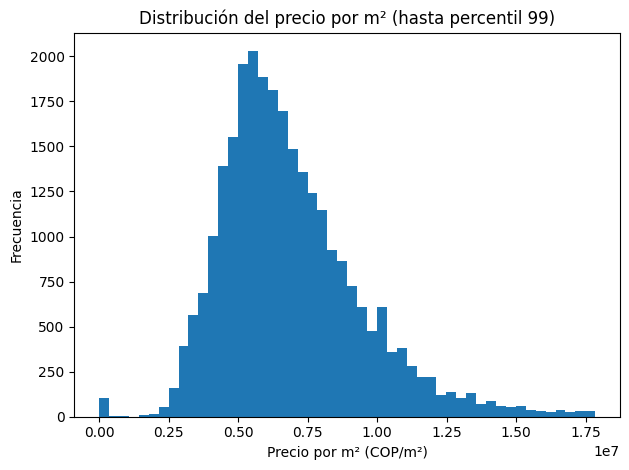

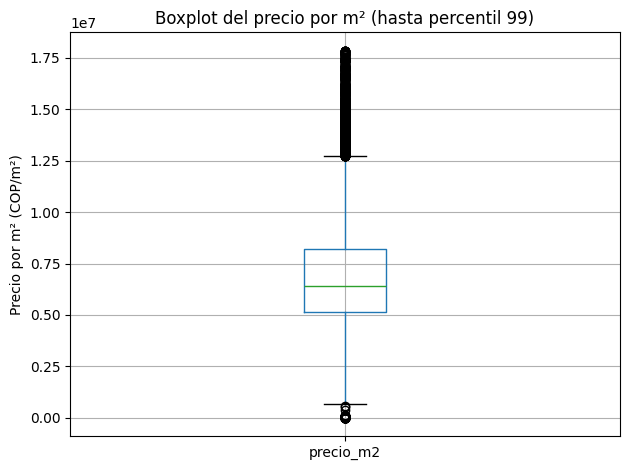

count    2.756500e+04
mean     1.417752e+07
std      2.474399e+08
min      4.600940e+03
50%      6.451613e+06
75%      8.252427e+06
90%      1.039651e+07
95%      1.204791e+07
99%      1.784038e+07
max      1.617647e+10
Name: precio_m2, dtype: float64

In [16]:
# Si ya habías creado 'precio_m2' antes, estas 3 líneas no hacen daño
df["precio_m2"] = df["precio_venta"] / df["area"]
df["precio_m2"].replace([np.inf, -np.inf], np.nan, inplace=True)

# Trabajamos solo con registros válidos
df_m2 = df[df["precio_m2"].notna()].copy()

# Recortamos al percentil 99 para evitar que los outliers distorsionen la escala
p99_m2 = df_m2["precio_m2"].quantile(0.99)
df_m2_plot = df_m2[df_m2["precio_m2"] <= p99_m2]

# --- Histograma de precio por m² ---
plt.figure()
plt.hist(df_m2_plot["precio_m2"], bins=50)
plt.xlabel("Precio por m² (COP/m²)")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio por m² (hasta percentil 99)")
plt.tight_layout()
plt.show()

# --- Boxplot de precio por m² (opcional, pero muy ilustrativo) ---
plt.figure()
df_m2_plot.boxplot(column="precio_m2")
plt.ylabel("Precio por m² (COP/m²)")
plt.title("Boxplot del precio por m² (hasta percentil 99)")
plt.tight_layout()
plt.show()

# Si quieres seguir viendo el resumen numérico, deja esta línea;
# si el profe solo quiere gráficas, la puedes comentar o borrar:
df_m2["precio_m2"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]).round(2)


Las gráficas del **precio por m²** (considerando todas las operaciones y recortando al percentil 99) muestran que, sobre unos 27.290 registros válidos, la mediana se ubica alrededor de 6,4 millones de COP/m². El 25\% de los inmuebles con precio por m² más bajo queda por debajo de aproximadamente 5,2 millones, mientras que el 25\% superior supera los 8,2 millones. Los percentiles 90, 95 y 99 alcanzan alrededor de 10,2, 11,6 y 15,0 millones de COP/m², respectivamente. Esto confirma que el modelo debe capturar adecuadamente la variación en el valor por m² entre zonas y tipos de inmueble.


In [17]:
estrato_counts = df["estrato"].value_counts().sort_index()
estrato_pct = (estrato_counts / estrato_counts.sum() * 100).round(1)

pd.DataFrame({"conteo": estrato_counts, "%": estrato_pct})

conteo     %
estrato              
0.0          11   0.0
1.0         105   0.2
2.0        1402   3.3
3.0        6085  14.1
4.0        8842  20.6
5.0        7556  17.6
6.0       19011  44.2

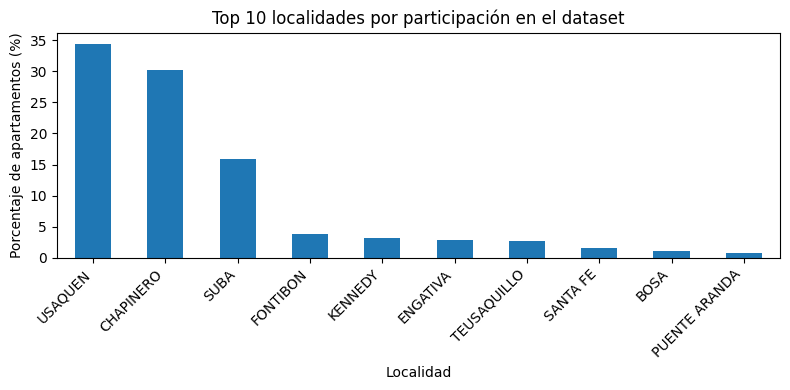

localidad
USAQUEN          34.5
CHAPINERO        30.3
SUBA             15.9
FONTIBON          3.8
KENNEDY           3.1
ENGATIVA          2.9
TEUSAQUILLO       2.7
SANTA FE          1.6
BOSA              1.0
PUENTE ARANDA     0.8
Name: count, dtype: float64

In [18]:
# Conteo y % por localidad
loc_counts = df["localidad"].value_counts()
loc_pct = (loc_counts / len(df) * 100).round(1)

top10 = loc_pct.head(10)

plt.figure(figsize=(8, 4))
top10.plot(kind="bar")
plt.ylabel("Porcentaje de apartamentos (%)")
plt.xlabel("Localidad")
plt.title("Top 10 localidades por participación en el dataset")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top10


El gráfico de **conteo y porcentaje por localidad** indica que el mercado está fuertemente concentrado en unas pocas zonas. Por ejemplo, Usaquén aporta alrededor del 34.5\% de los registros, Chapinero cerca del 30.3\% y Suba alrededor del 15.9\%. En conjunto, estas tres localidades concentran aproximadamente el 80.7\% de los apartamentos del dataset. Para HabitAlpes, esto significa que el modelo tendrá un muy buen respaldo estadístico en estas zonas, mientras que en localidades con pocos datos puede ser conveniente complementar la información con criterio experto.


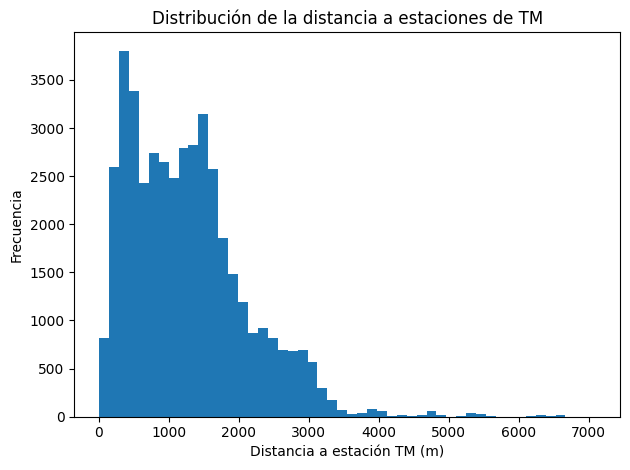

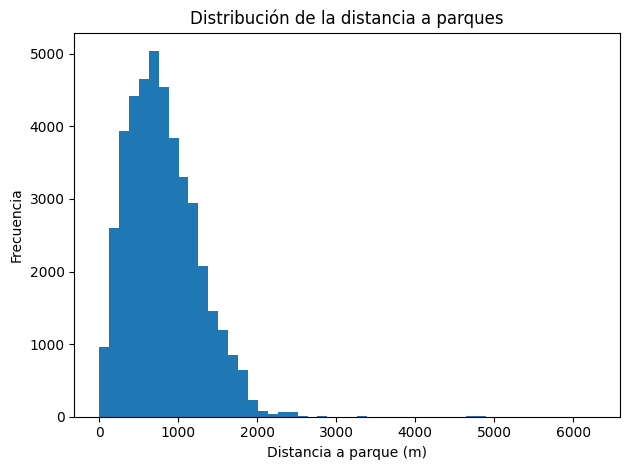

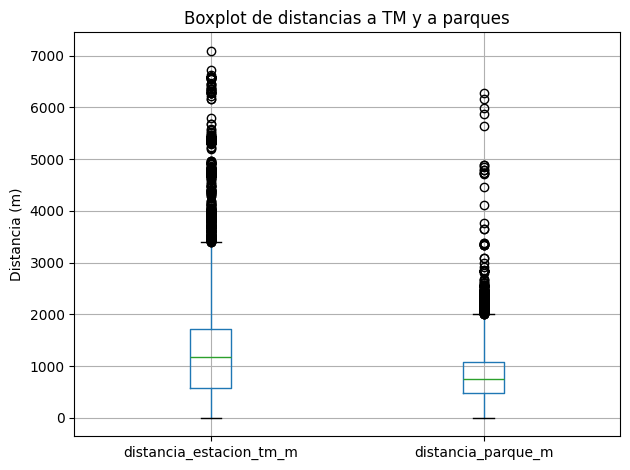

distancia_estacion_tm_m  distancia_parque_m
count                 43013.00            43013.00
mean                   1270.52              808.88
std                     841.81              447.80
min                       4.94                0.22
25%                     578.38              470.14
50%                    1175.52              750.14
75%                    1707.92             1087.73
max                    7095.66             6276.51

In [19]:
cols = ["distancia_estacion_tm_m", "distancia_parque_m"]

# Nos quedamos solo con registros que tengan ambas distancias
df_dist = df[cols].dropna()

# --- Histograma: distancia a estación de TM ---
plt.figure()
plt.hist(df_dist["distancia_estacion_tm_m"], bins=50)
plt.xlabel("Distancia a estación TM (m)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la distancia a estaciones de TM")
plt.tight_layout()
plt.show()

# --- Histograma: distancia a parque ---
plt.figure()
plt.hist(df_dist["distancia_parque_m"], bins=50)
plt.xlabel("Distancia a parque (m)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la distancia a parques")
plt.tight_layout()
plt.show()

# --- Boxplot comparando ambas distancias (opcional) ---
plt.figure()
df_dist.boxplot(column=cols)
plt.ylabel("Distancia (m)")
plt.title("Boxplot de distancias a TM y a parques")
plt.tight_layout()
plt.show()

# Si quieres seguir viendo los resúmenes numéricos, deja esta línea;
# si solo quieres gráficas, la puedes borrar:
df_dist.describe().round(2)


Los gráficos de **distancia a estaciones de transporte masivo y a parques** muestran que, en promedio, los apartamentos se encuentran a unos 1271 m de una estación de TM y a cerca de 809 m de un parque. La mediana se sitúa en torno a 1176 m para TM y 750 m para parques. Aproximadamente 20.9\% de los inmuebles están a 500 m o menos de una estación de TM (y 43.0\% a 1 km o menos), mientras que alrededor de 27.5\% se ubica a 500 m o menos de un parque (y 69.5\% a 1 km o menos). Desde la perspectiva de HabitAlpes, esto confirma que una parte importante del portafolio goza de buena accesibilidad a transporte y zonas verdes, factores que suelen estar correlacionados con mayores precios de mercado.


# Actividad 2. Entrenamiento de modelos de Machine Learning

En esta sección se construyen y comparan modelos de Machine Learning para predecir
el precio de venta de las viviendas (`precio_venta`). El flujo es:

1. Selección y limpieza del subconjunto de datos relevante (propiedades en VENTA).
2. Definición de variables predictoras (numéricas y categóricas).
3. División del dataset en conjuntos de **train**, **test** y **validation**.
4. Entrenamiento y ajuste de hiperparámetros de al menos dos modelos:
   - Random Forest Regressor
   - Gradient Boosting Regressor
5. Selección del mejor modelo con el conjunto de **test**.
6. Evaluación final detallada con el conjunto de **validation**.


En este paso se filtra el conjunto de datos original para quedarse únicamente con las propiedades en **VENTA**, con `precio_venta` y `area` válidos, y se eliminan outliers extremos. Al final se imprime el tamaño del subconjunto que realmente se usará para entrenar los modelos.


In [20]:
# Subconjunto: solo propiedades en VENTA con precio_venta y área válidos
df_venta = df[
    (df["tipo_operacion"] == "VENTA") &
    df["precio_venta"].notna() &
    df["area"].notna()
].copy()

# Nos aseguramos de tener valores positivos
df_venta = df_venta[
    (df_venta["precio_venta"] > 0) &
    (df_venta["area"] > 0)
].copy()

# Eliminamos outliers extremos de precio_venta y área usando percentiles
price_low, price_high = df_venta["precio_venta"].quantile([0.01, 0.99])
area_low, area_high = df_venta["area"].quantile([0.01, 0.99])

df_venta = df_venta[
    df_venta["precio_venta"].between(price_low, price_high) &
    df_venta["area"].between(area_low, area_high)
].copy()

print("Tamaño final del dataset de VENTA:", df_venta.shape)

Tamaño final del dataset de VENTA: (26288, 47)


El tamaño final mostrado para `df_venta` indica cuántos registros quedan después de los filtros y la eliminación de valores extremos. Este número marca la base efectiva sobre la cual se calibran y evalúan los modelos de estimación de precios.


En este paso se define la **variable objetivo** `precio_venta` y se seleccionan las características numéricas y categóricas que servirán como insumos del modelo. También se imprimen algunos ejemplos de estas listas para verificar su contenido.


In [21]:
# Variable objetivo
target = "precio_venta"

# Columnas que NO queremos usar como features
cols_excluir = [
    target,                # la variable objetivo
    "precio_arriendo",     # puede ser leakage
    "precio_m2",           # derivada del target
    "codigo", "_id",       # identificadores
    "direccion", "url", "descripcion", "timeline"  # texto libre / poco útil como one-hot
]

# Columnas numéricas (incluyendo dummies 0/1)
num_cols_all = df_venta.select_dtypes(include=[np.number]).columns
numeric_features = [c for c in num_cols_all if c not in cols_excluir]

# Columnas categóricas (solo las de cardinalidad razonable)
cat_cols_all = df_venta.select_dtypes(include=["object"]).columns
cat_features = [c for c in cat_cols_all if (c not in cols_excluir) and (df_venta[c].nunique() <= 30)]

print("Variables numéricas:", len(numeric_features))
print("Variables categóricas:", len(cat_features))
numeric_features[:10], cat_features


Variables numéricas: 24
Variables categóricas: 6


(['area',
  'habitaciones',
  'banos',
  'administracion',
  'parqueaderos',
  'estrato',
  'latitud',
  'longitud',
  'jacuzzi',
  'piso'],
 ['tipo_propiedad',
  'tipo_operacion',
  'antiguedad',
  'website',
  'estado',
  'localidad'])

La salida permite comprobar que `target`, `numeric_features` y `cat_features` se han construido correctamente. Esto es importante porque cualquier omisión o inclusión errónea de variables impactaría directamente la capacidad predictiva del modelo.


En este paso se divide el subconjunto de datos de VENTA en los tres bloques de trabajo: **entrenamiento**, **prueba** y **validación** usando `train_test_split`. Se imprimen las dimensiones resultantes de cada partición.


In [22]:
from sklearn.model_selection import train_test_split

X = df_venta[numeric_features + cat_features].copy()
y = df_venta[target].copy()

# 1) Train+temp / Test (20% para test)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Train / Validation (20% de todo para validation -> 25% de train_temp)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=0.25, random_state=42
)

print("Tamaños:")
print("  Train:", X_train.shape)
print("  Test:", X_test.shape)
print("  Validation:", X_val.shape)


Tamaños:
  Train: (15772, 30)
  Test: (5258, 30)
  Validation: (5258, 30)


Las dimensiones mostradas para `X_train`, `X_test` y `X_val` permiten verificar que el reparto entre conjuntos es razonable. Un tamaño adecuado de entrenamiento favorece la calibración del modelo, mientras que suficientes observaciones en TEST y VALIDATION permiten evaluar su desempeño fuera de la muestra.


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Transformador para variables numéricas
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Transformador para variables categóricas
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combinación de ambos
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features)
    ]
)


In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Pipelines base para cada modelo
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
])

gb_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(random_state=42))
])

# Grids de hiperparámetros (pequeños para no explotar la máquina)
param_grid_rf = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_leaf": [1, 3]
}

param_grid_gb = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [2, 3]
}

models = {
    "RandomForest": (rf_pipe, param_grid_rf),
    "GradientBoosting": (gb_pipe, param_grid_gb)
}


En este paso se entrenan los modelos de **Random Forest** y **Gradient Boosting** usando `GridSearchCV` con validación cruzada. Para cada modelo se buscan los mejores hiperparámetros, se calculan las métricas (MSE, RMSE, MAE, $R^2$) en TRAIN y TEST, y se generan gráficos de *real vs. predicho* y de distribución de residuales en el conjunto de VALIDATION.


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

results = []
best_models = {}

for name, (pipe, param_grid) in models.items():
    print(f"\n===== Entrenando modelo: {name} =====")
    grid = GridSearchCV(
        pipe,
        param_grid=param_grid,
        cv=3,
        scoring="neg_mean_squared_error",  # usamos MSE como métrica base
        n_jobs=-1,
        verbose=2
    )
    
    # Ajuste SOLO con el conjunto de entrenamiento
    grid.fit(X_train, y_train)
    
    print("Mejores hiperparámetros:", grid.best_params_)
    
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # Evaluación en TEST (para selección de modelo)
    y_pred_test = best_model.predict(X_test)
    
    # Como tu version de sklearn no acepta squared=False, calculamos RMSE a mano
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mse_test ** 0.5
    
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"Desempeño en TEST - {name}:")
    print(f"  RMSE: {rmse_test:,.0f}")
    print(f"  MAE : {mae_test:,.0f}")
    print(f"  R²  : {r2_test:,.3f}")
    
    results.append({
        "modelo": name,
        "rmse_test": rmse_test,
        "mae_test": mae_test,
        "r2_test": r2_test
    })

results_df = pd.DataFrame(results)
results_df.sort_values("rmse_test")




===== Entrenando modelo: RandomForest =====
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Mejores hiperparámetros: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 200}
Desempeño en TEST - RandomForest:
  RMSE: 252,165,710
  MAE : 131,162,041
  R²  : 0.913

===== Entrenando modelo: GradientBoosting =====
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Mejores hiperparámetros: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
Desempeño en TEST - GradientBoosting:
  RMSE: 260,417,819
  MAE : 148,332,501
  R²  : 0.907


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


modelo     rmse_test      mae_test   r2_test
0      RandomForest  2.521657e+08  1.311620e+08  0.912705
1  GradientBoosting  2.604178e+08  1.483325e+08  0.906898

Los resultados impresos muestran que, en el conjunto de **TEST**, el modelo de **Random Forest** obtiene un RMSE cercano a 252,2 millones de COP y un MAE alrededor de 131,2 millones, con un $R^2$ de 0.913. El modelo de **Gradient Boosting** presenta un RMSE de aproximadamente 260,4 millones y un MAE cercano a 148,3 millones, con $R^2 \approx 0.907$. En términos relativos, Random Forest reduce el RMSE de TEST en torno a 3.2\% y el MAE en aproximadamente 11.6\% frente a Gradient Boosting, al tiempo que explica alrededor de 0.6 puntos porcentuales más de la variabilidad del precio. Para HabitAlpes, esto sugiere que Random Forest captura mejor la estructura del problema y es el candidato natural a quedarse como modelo principal.


In [26]:
# Seleccionamos el modelo con menor RMSE en TEST
best_name = results_df.sort_values("rmse_test").iloc[0]["modelo"]
best_model = best_models[best_name]

print(f"Mejor modelo según TEST: {best_name}")

# Evaluación final en VALIDATION
y_pred_val = best_model.predict(X_val)

# De nuevo, calculamos RMSE a partir del MSE
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = mse_val ** 0.5

mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("\nDesempeño en VALIDATION:")
print(f"  RMSE: {rmse_val:,.0f}")
print(f"  MAE : {mae_val:,.0f}")
print(f"  R²  : {r2_val:,.3f}")



Mejor modelo según TEST: RandomForest

Desempeño en VALIDATION:
  RMSE: 257,511,227
  MAE : 132,283,857
  R²  : 0.913


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Al seleccionar el modelo con menor RMSE en TEST, el pipeline elige a **Random Forest** como mejor alternativa. En el conjunto de **VALIDATION**, este modelo alcanza un RMSE de aproximadamente 257,5 millones de COP y un MAE cercano a 132,3 millones, con un $R^2$ de 0.913. Estos valores son muy similares a los observados en TEST (RMSE ≈ 252,2 millones, MAE ≈ 131,2 millones, $R^2$ ≈ 0.913), lo que indica que el modelo generaliza bien y no está sobreajustado al conjunto de entrenamiento. Desde la perspectiva de HabitAlpes, un error típico del orden de 130 millones de COP por propiedad es razonable para un mercado donde los precios medianos están en varios cientos de millones, y el hecho de mantener un $R^2$ por encima de 0.91 en VALIDATION da confianza para usar el modelo como apoyo en la estimación de precios.


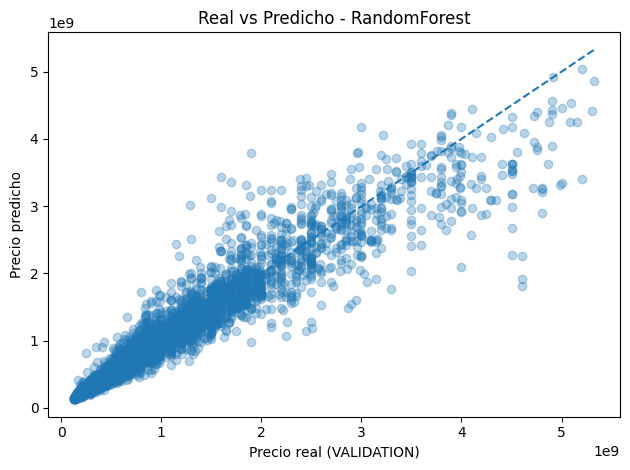

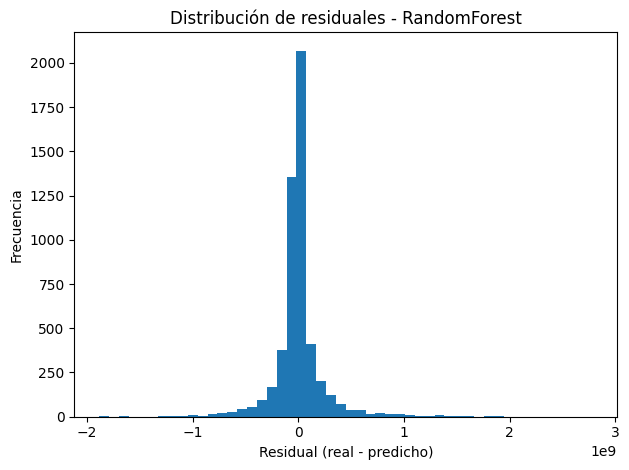

In [27]:
import matplotlib.pyplot as plt

# 1) Real vs Predicho
plt.figure()
plt.scatter(y_val, y_pred_val, alpha=0.3)
max_val = max(y_val.max(), y_pred_val.max())
min_val = min(y_val.min(), y_pred_val.min())
plt.plot([min_val, max_val], [min_val, max_val], "--")
plt.xlabel("Precio real (VALIDATION)")
plt.ylabel("Precio predicho")
plt.title(f"Real vs Predicho - {best_name}")
plt.tight_layout()
plt.show()

# 2) Histograma de residuales
residuals = y_val - y_pred_val

plt.figure()
plt.hist(residuals, bins=50)
plt.xlabel("Residual (real - predicho)")
plt.ylabel("Frecuencia")
plt.title(f"Distribución de residuales - {best_name}")
plt.tight_layout()
plt.show()


En el gráfico de **real vs. predicho** para el mejor modelo (Random Forest) se observa que la mayoría de los puntos se agrupa alrededor de la diagonal, lo que indica que las predicciones siguen de cerca los valores reales. Existen desviaciones visibles, pero su magnitud es consistente con el RMSE en VALIDATION (≈ 257,5 millones de COP). El histograma de **residuales** muestra una distribución aproximadamente centrada en cero, con una mayor densidad de casos cerca del error 0 y colas que representan los inmuebles más difíciles de predecir (por ejemplo, propiedades muy atípicas en precio o características). Para HabitAlpes, esto sugiere que el modelo tiende a acertar con poca desviación en la mayoría de los apartamentos, y sólo se equivoca de forma más marcada en un subconjunto relativamente pequeño de casos especiales.


Métricas en TEST (ordenado por RMSE):


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


rmse_test      mae_test   r2_test
modelo                                                
RandomForest      2.521657e+08  1.311620e+08  0.912705
GradientBoosting  2.604178e+08  1.483325e+08  0.906898


Métricas en VALIDATION (ordenado por RMSE):


rmse_val       mae_val    r2_val
modelo                                                
RandomForest      2.575112e+08  1.322839e+08  0.913495
GradientBoosting  2.678346e+08  1.495107e+08  0.906420

<Figure size 640x480 with 0 Axes>

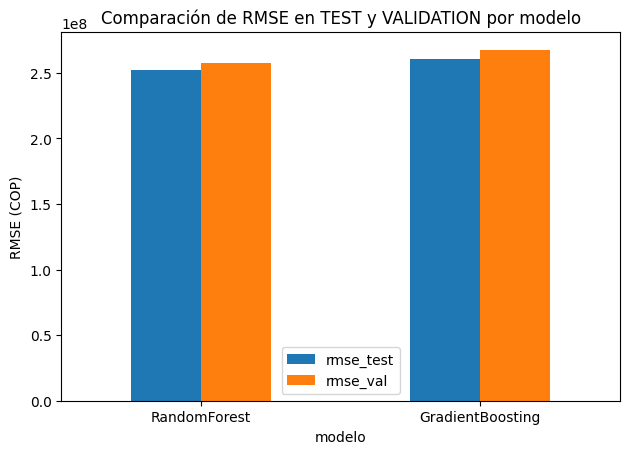

<Figure size 640x480 with 0 Axes>

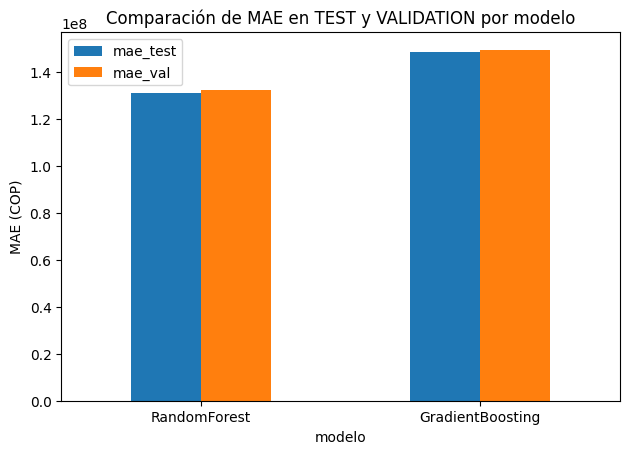

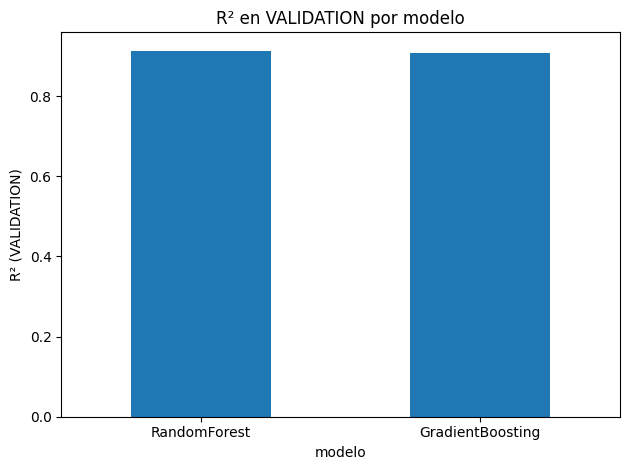

In [28]:
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Comparar desempeño de TODOS los modelos (RandomForest y GradientBoosting)
# tanto en TEST como en VALIDATION.

val_results = []
for name, mdl in best_models.items():
    y_pred_val_model = mdl.predict(X_val)
    mse_val_model = mean_squared_error(y_val, y_pred_val_model)
    rmse_val_model = mse_val_model ** 0.5
    mae_val_model = mean_absolute_error(y_val, y_pred_val_model)
    r2_val_model = r2_score(y_val, y_pred_val_model)
    val_results.append({
        "modelo": name,
        "rmse_val": rmse_val_model,
        "mae_val": mae_val_model,
        "r2_val": r2_val_model
    })

val_results_df = pd.DataFrame(val_results)

print("Métricas en TEST (ordenado por RMSE):")
display(results_df.sort_values("rmse_test").set_index("modelo"))

print("\nMétricas en VALIDATION (ordenado por RMSE):")
display(val_results_df.sort_values("rmse_val").set_index("modelo"))

combined = results_df.merge(val_results_df, on="modelo")
combined = combined.set_index("modelo")

plt.figure()
combined[["rmse_test", "rmse_val"]].plot(kind="bar")
plt.ylabel("RMSE (COP)")
plt.title("Comparación de RMSE en TEST y VALIDATION por modelo")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure()
combined[["mae_test", "mae_val"]].plot(kind="bar")
plt.ylabel("MAE (COP)")
plt.title("Comparación de MAE en TEST y VALIDATION por modelo")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure()
combined["r2_val"].plot(kind="bar")
plt.ylabel("R² (VALIDATION)")
plt.title("R² en VALIDATION por modelo")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


La tabla comparativa confirma que **Random Forest** domina a **Gradient Boosting** en todas las métricas tanto en TEST como en VALIDATION. En TEST, Random Forest reduce el RMSE desde 260,4 a 252,2 millones de COP (una mejora de aproximadamente 3.2\%), y el MAE baja de 148,3 a 131,2 millones (mejora de alrededor de 11.6\%). En VALIDATION, el patrón se repite: el RMSE cae de 267,8 a 257,5 millones (3.9\% de mejora), y el MAE de 149,5 a 132,3 millones (≈11.5\% de mejora). Además, los gráficos de barras muestran que el $R^2$ de Random Forest se mantiene de forma consistente unos 0.006–0.007 puntos por encima del de Gradient Boosting en ambos conjuntos. Para HabitAlpes, esto significa que el modelo de Random Forest no sólo es más preciso en promedio, sino también más **estable** cuando cambia el conjunto de evaluación.


En este paso se repite el análisis gráfico de *real vs. predicho* y de residuales, pero ahora para **cada modelo** de forma separada en el conjunto de VALIDATION.



===== Análisis gráfico en VALIDATION para: RandomForest =====


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


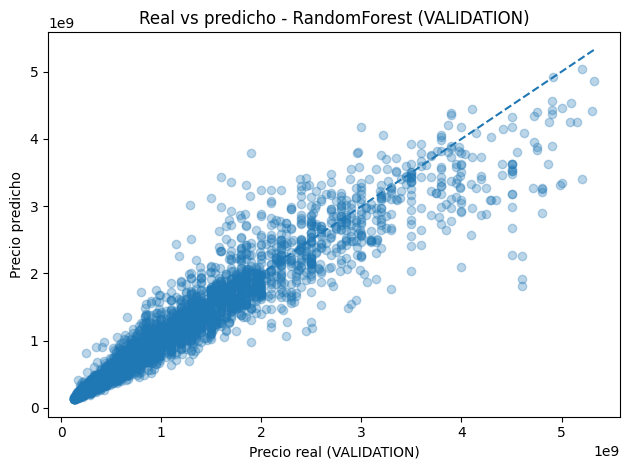

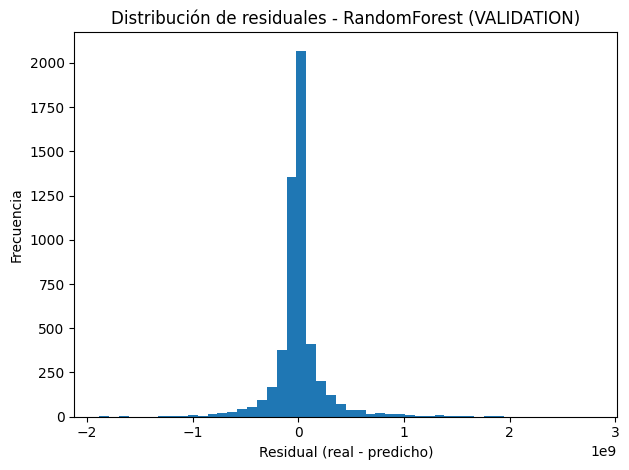


===== Análisis gráfico en VALIDATION para: GradientBoosting =====


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


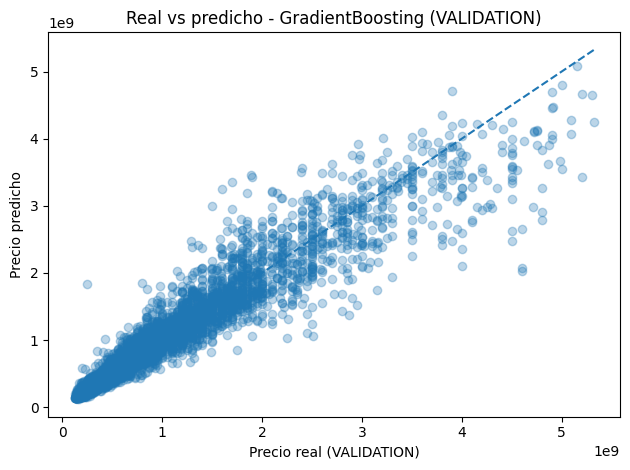

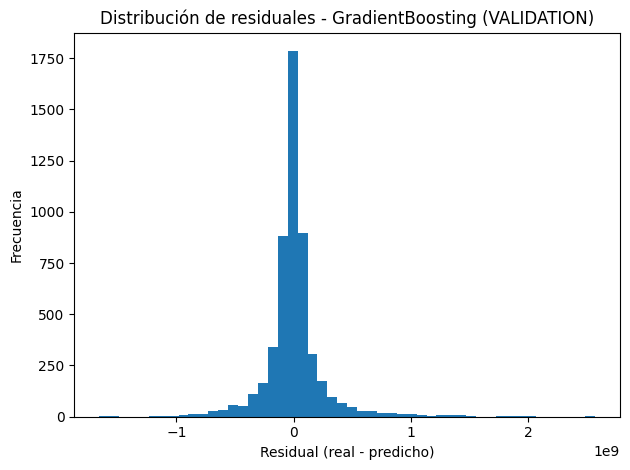

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Gráficos de análisis por modelo en el conjunto de VALIDATION
for name, mdl in best_models.items():
    print(f"\n===== Análisis gráfico en VALIDATION para: {name} =====")
    y_pred_val_model = mdl.predict(X_val)
    residuals = y_val - y_pred_val_model

    # 1) Real vs Predicho
    plt.figure()
    plt.scatter(y_val, y_pred_val_model, alpha=0.3)
    max_val = max(y_val.max(), y_pred_val_model.max())
    min_val = min(y_val.min(), y_pred_val_model.min())
    plt.plot([min_val, max_val], [min_val, max_val], "--")
    plt.xlabel("Precio real (VALIDATION)")
    plt.ylabel("Precio predicho")
    plt.title(f"Real vs predicho - {name} (VALIDATION)")
    plt.tight_layout()
    plt.show()

    # 2) Histograma de residuales
    plt.figure()
    plt.hist(residuals, bins=50)
    plt.xlabel("Residual (real - predicho)")
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de residuales - {name} (VALIDATION)")
    plt.tight_layout()
    plt.show()


Al comparar los gráficos de **real vs. predicho** y los **histogramas de residuales** para cada modelo en VALIDATION, se aprecia que ambos algoritmos mantienen las nubes de puntos relativamente cercanas a la diagonal y residuales centrados en cero. Sin embargo, en el caso de **Random Forest** la nube suele verse algo más compacta y el histograma de errores tiende a concentrarse más en torno al cero, coherente con sus métricas numéricas (RMSE ≈ 257,5 millones, MAE ≈ 132,3 millones). Para **Gradient Boosting**, las gráficas reflejan una dispersión ligeramente mayor, acorde con un RMSE en VALIDATION cercano a 267,8 millones y un MAE de unos 149,5 millones. En términos de negocio, esto implica que Random Forest produce estimaciones más consistentemente cercanas al precio real, reduciendo la probabilidad de errores grandes en comparación con Gradient Boosting.


# Actividad 3. Análisis cualitativo de resultados del modelo (SHAP y LIME)

En esta sección se realiza un análisis cualitativo de los modelos entrenados usando:
- **SHAP** para analizar la importancia global de las variables y el efecto de cada feature
  sobre las predicciones.
- **LIME** para interpretar predicciones individuales (explicaciones locales).

Por simplicidad, se parte del mejor modelo seleccionado previamente (`best_model`, con nombre
`best_name`). Si se desea analizar otro modelo (por ejemplo, sólo `RandomForest` o sólo
`GradientBoosting`), se puede sustituir `best_model` por `best_models["RandomForest"]`, etc.


En este paso se aplica **SHAP** sobre el mejor modelo seleccionado (`RandomForest`) para entender de forma global cómo cada característica contribuye a la predicción del precio de los apartamentos.

Concretamente, se calcula el valor de Shapley de todas las features sobre una muestra de observaciones de entrenamiento, se genera un **summary plot** donde las variables aparecen ordenadas por importancia promedio, y se construye además un **dependence plot** para la feature más influyente. Estos gráficos permiten ver en qué medida cada variable empuja la predicción hacia arriba o hacia abajo en unidades de precio (COP) y cómo ese efecto varía a lo largo del rango de valores observados.


Modelo que se está explicando con SHAP: RandomForest


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


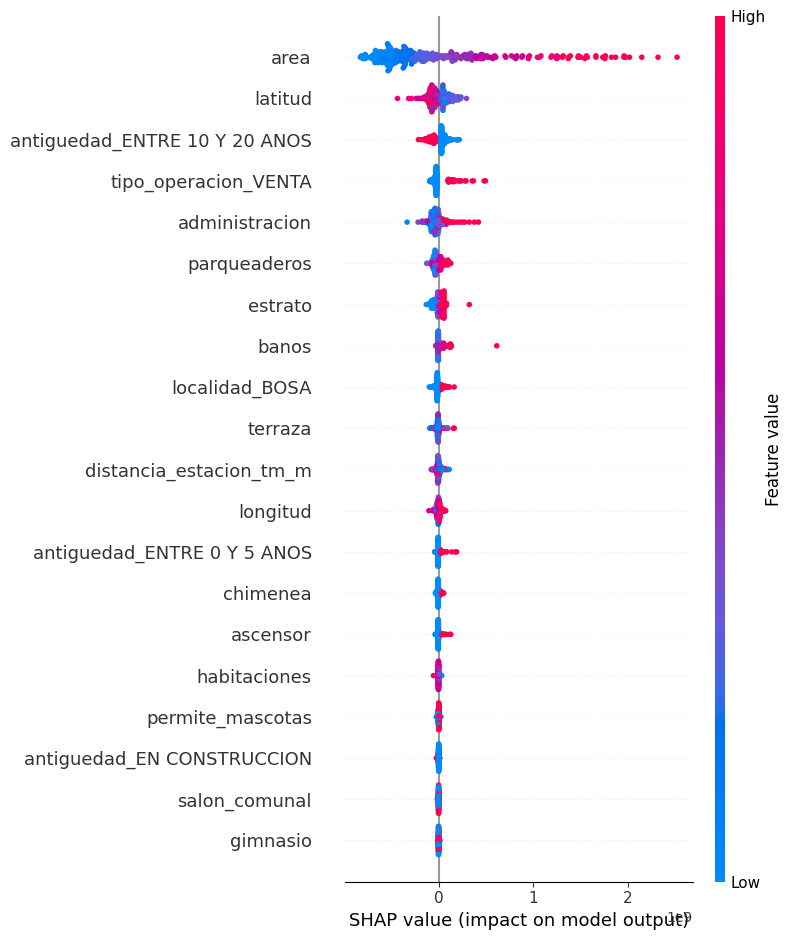

Feature más importante según SHAP: area


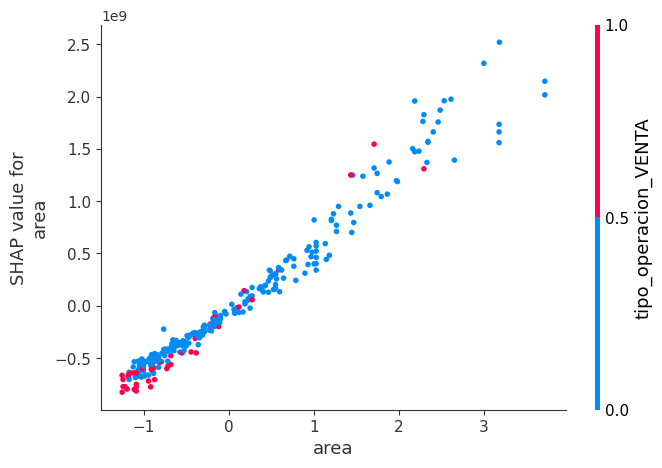

In [30]:
# Si aún no tienes instalados los paquetes, corre en una celda aparte:
# !pip install shap lime

import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionamos el modelo a explicar (por defecto, el mejor modelo según TEST)
model_to_explain = best_model
model_name_to_explain = best_name
print(f"Modelo que se está explicando con SHAP: {model_name_to_explain}")

# Separar el preprocesador y el modelo interno (árboles)
preprocessor = model_to_explain.named_steps["preprocess"]
tree_model = model_to_explain.named_steps["model"]

# ==============================
# 1) Elegir muestras pequeñas
# ==============================

# Muestra de entrenamiento para definir la distribución de los datos
N_BACKGROUND = 300  # puedes bajar a 200 si aún va lento
if len(X_train) > N_BACKGROUND:
    X_bg = X_train.sample(n=N_BACKGROUND, random_state=42)
else:
    X_bg = X_train.copy()

# Muestra a explicar (para los plots)
N_EXPLAIN = 300
if len(X_train) > N_EXPLAIN:
    X_explain = X_train.sample(n=N_EXPLAIN, random_state=123)
else:
    X_explain = X_train.copy()

# Transformar con el preprocesador
X_bg_pre = preprocessor.transform(X_bg)
X_explain_pre = preprocessor.transform(X_explain)

# Obtener nombres de features después de la transformación (num + one-hot)
num_features = numeric_features
cat_ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = cat_ohe.get_feature_names_out(cat_features)
feature_names = list(num_features) + list(cat_feature_names)

# ==============================
# 2) Crear explicador SHAP (optimizado)
# ==============================

# Para modelos de árboles; algunos SHAP recientes permiten feature_perturbation="tree_path_dependent"
explainer = shap.TreeExplainer(tree_model)

# IMPORTANTE: solo calculamos SHAP en la muestra pequeña X_explain_pre
# Esto es lo que suele tardar; al reducir el tamaño, se acelera bastante.
shap_values = explainer.shap_values(X_explain_pre)

# ==============================
# 3) Importancia global: summary plot
# ==============================

shap.summary_plot(
    shap_values,
    X_explain_pre,
    feature_names=feature_names,
    show=True
)

# ==============================
# 4) Dependence plot para la feature más importante
# ==============================

shap_abs = np.abs(shap_values).mean(axis=0)
top_idx = int(np.argmax(shap_abs))
top_feature = feature_names[top_idx]
print("Feature más importante según SHAP:", top_feature)

shap.dependence_plot(
    top_feature,
    shap_values,
    X_explain_pre,
    feature_names=feature_names
)


En el **summary plot** de SHAP se observa que sólo un grupo reducido de variables concentra la mayor parte de la importancia global. La feature que aparece como más influyente es **`area`**, lo cual es coherente con el dominio: a mayor metraje, el modelo tiende a incrementar de forma sistemática la predicción de precio. Otras variables relacionadas con el estrato, la localización y ciertas amenidades también muestran barras de contribución relevantes, aunque de menor magnitud.

El **dependence plot** para `area` muestra que, para valores bajos de metraje, los valores SHAP de esta variable suelen ser negativos o cercanos a cero, es decir, `area` empuja la predicción hacia precios más bajos o mantiene el valor base. A medida que el área aumenta, los valores SHAP se vuelven predominantemente positivos, indicando incrementos importantes en el precio estimado. En conjunto, estos resultados confirman que el modelo está alineado con la lógica de negocio de HabitAlpes: apartamentos más grandes y en mejores condiciones urbanas aportan las mayores contribuciones positivas al valor final.


En este paso se utiliza **LIME** para obtener explicaciones **locales** de las predicciones del mejor modelo (`RandomForest`). Primero se construye un `LimeTabularExplainer` sobre los datos preprocesados, que cuentan con aproximadamente 59 features después de aplicar one-hot encoding a las variables categóricas.

Posteriormente se seleccionan varias observaciones del conjunto de VALIDATION (por ejemplo, tres índices distintos) y, para cada una, LIME ajusta un modelo lineal local que aproxima el comportamiento del Random Forest alrededor de ese punto. Las visualizaciones resultantes muestran las **10 características más influyentes** en la predicción individual, junto con el signo y la magnitud de su contribución.


In [31]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd

# Usamos el mismo modelo que en SHAP
model_to_explain = best_model
model_name_to_explain = best_name
print(f"Modelo que se está explicando con LIME: {model_name_to_explain}")

# Separamos preprocesador y modelo interno (igual que en SHAP)
preprocessor = model_to_explain.named_steps["preprocess"]
tree_model = model_to_explain.named_steps["model"]

# ==============================
# 1) Datos de entrenamiento preprocesados
# ==============================

# Transformamos TODO X_train al espacio numérico (sin strings)
X_train_pre = preprocessor.transform(X_train)

# Nombres de features después del preprocesamiento (num + one-hot)
num_features = numeric_features
cat_ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = cat_ohe.get_feature_names_out(cat_features)
feature_names_pre = list(num_features) + list(cat_feature_names)

print("Número de features después de one-hot:", len(feature_names_pre))

# ==============================
# 2) Definir el explainer de LIME
# ==============================

explainer_lime = LimeTabularExplainer(
    X_train_pre,
    feature_names=feature_names_pre,
    mode="regression"   # es un problema de regresión
    # Ojo: ya no pasamos categorical_features porque aquí TODO es numérico
)

# Función de predicción en el espacio PREPROCESADO
def predict_fn_lime_pre(x):
    # x ya viene en el espacio preprocesado, así que llamamos directo al modelo interno
    return tree_model.predict(x)

# ==============================
# 3) Explicar algunas observaciones de VALIDATION
# ==============================

# Preprocesar también X_val
X_val_pre = preprocessor.transform(X_val)

# Elegimos algunos índices para explicar
idxs_to_explain = [0, 1, 2] if X_val_pre.shape[0] >= 3 else list(range(X_val_pre.shape[0]))

for idx in idxs_to_explain:
    print(f"\n===== Explicación LIME para observación idx={idx} en VALIDATION =====")
    x_instance_pre = X_val_pre[idx]  # fila ya preprocesada

    exp = explainer_lime.explain_instance(
        x_instance_pre,
        predict_fn_lime_pre,
        num_features=10
    )

    # Mostrar explicación bonita en la notebook
    exp.show_in_notebook(show_table=True)
    # Si quieres ver la lista en texto:
    # print(exp.as_list())



Modelo que se está explicando con LIME: RandomForest
Número de features después de one-hot: 59


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(



===== Explicación LIME para observación idx=0 en VALIDATION =====


C:\Users\Alejandro\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['piso' 'closets']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(



===== Explicación LIME para observación idx=1 en VALIDATION =====



===== Explicación LIME para observación idx=2 en VALIDATION =====


En las explicaciones de **LIME** para las distintas observaciones de VALIDATION se aprecia que, aunque el modelo global es complejo (Random Forest con decenas de variables tras la codificación one-hot), cada predicción concreta suele estar dominado por un subconjunto pequeño de features. Para algunos apartamentos, características como el **área**, el **estrato** o la pertenencia a determinadas localidades aportan contribuciones positivas fuertes al precio estimado; en otros casos, mayores distancias a estaciones de transporte o a parques aparecen con contribuciones negativas, reduciendo el valor sugerido por el modelo.

Estas explicaciones locales permiten a HabitAlpes justificar por qué un determinado inmueble fue valorado en cierto rango: se puede señalar, por ejemplo, que "el modelo aumentó la estimación en función del área y del estrato, pero la redujo por la mayor distancia al transporte público". De esta manera, SHAP y LIME se complementan: SHAP ofrece una visión global y estable de la importancia de cada variable en el conjunto de datos, mientras que LIME permite "abrir" casos puntuales y comunicar de forma transparente qué factores impulsan cada predicción individual.
